In [1]:
import pyvisa
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [96]:
rm = pyvisa.ResourceManager()
oscilloscope = rm.open_resource('TCPIP::192.168.4.178::INSTR')

# Set up communication with the oscilloscope
rm = pyvisa.ResourceManager()

# Set the timeout to a higher value to ensure data retrieval isn't cut off
oscilloscope.timeout = 10000  # Timeout in milliseconds (10 seconds)

# Clear any existing errors
oscilloscope.write('*CLS')  # Clear the status register

# Select Channel 1 and set the data encoding to ASCII
oscilloscope.write('DATA:SOURCE CH1')  # Select Channel 1
oscilloscope.write(':WAV:SOUR CHAN1')   # Set encoding to ASCII
oscilloscope.write(':WAV:FORM WORD')
oscilloscope.query(':WAV:PRE?')
oscilloscope.query('TIM:POS?')

sing = oscilloscope.write(':SING')

In [155]:
# oscilloscope.write('*CLS')
oscilloscope.write('DATA:ENC RIBinary')  # Use Binary encoding (Raw IEEE Binary format)
oscilloscope.write('DATA:WIDTH 2')        # 2 bytes per sample (16-bit data)
oscilloscope.write('DATA:START 1')
oscilloscope.write('DATA:STOP 1000')
oscilloscope.write('RUN')

time_per_division = float(oscilloscope.query('TIMEBASE:SCALe?'))  # Get time per division
y_axis_division = float(oscilloscope.query('CHAN1:SCAL?'))
waveform_data = oscilloscope.query_binary_values(':WAV:DATA?', datatype='H', is_big_endian=True)
waveform_data = np.array(waveform_data)/(2**16)*y_axis_division*10

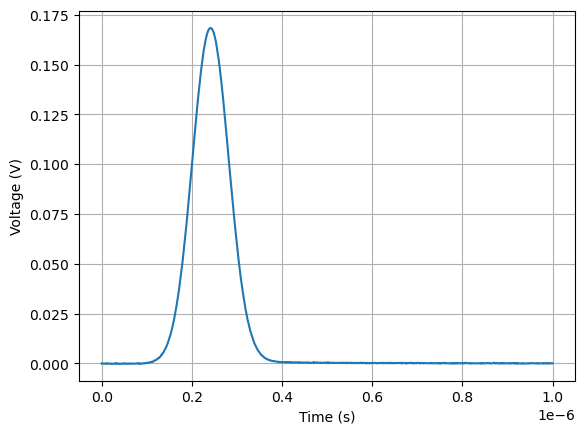

In [156]:
#1000 data points collected
name = 'A14_120MHzLPF_gaussian_100width_fullwidth1SD_1V'
pulse = np.array(waveform_data)
df = pd.DataFrame(pulse, index=x_axis)
df.to_csv(f'OscilloscopeData/{name}'+'.csv');

x_axis = np.linspace(0, 10*time_per_division, len(waveform_data))
plt.plot(x_axis, waveform_data-waveform_data[0])
plt.grid()
plt.xlabel('Time (s)');
plt.ylabel('Voltage (V)');
plt.savefig(f'OscilloscopeData/{name}.png');